<a href="https://colab.research.google.com/github/Thandesnr/Counry-Snapshot/blob/main/German_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! pip install dash


import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dash import Dash, html, dcc, callback, Output, Input,dash_table
import plotly.express as px


from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from scipy.stats import gaussian_kde,chi2_contingency
from scipy.signal import find_peaks
from sklearn.preprocessing import RobustScaler

from scipy import stats



In [8]:
# Loading the data from kaggle

df = pd.read_csv("/content/german_credit_data (1).csv")

df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


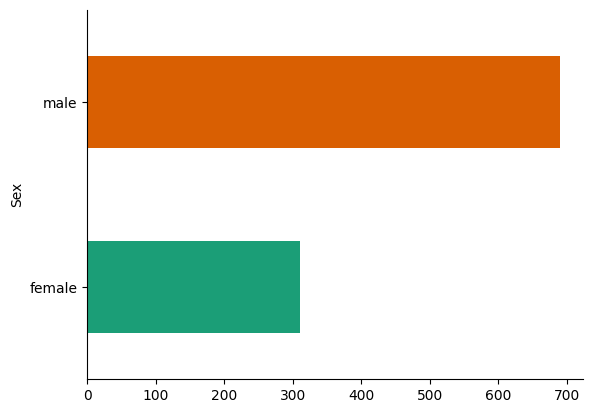

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Data analysis

Descriptive statistics

In [10]:
# decription and information
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


(None,
         Unnamed: 0          Age          Job  Credit amount     Duration
 count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
 mean    499.500000    35.546000     1.904000    3271.258000    20.903000
 std     288.819436    11.375469     0.653614    2822.736876    12.058814
 min       0.000000    19.000000     0.000000     250.000000     4.000000
 25%     249.750000    27.000000     2.000000    1365.500000    12.000000
 50%     499.500000    33.000000     2.000000    2319.500000    18.000000
 75%     749.250000    42.000000     2.000000    3972.250000    24.000000
 max     999.000000    75.000000     3.000000   18424.000000    72.000000)

In [11]:
# unique values
savings_acc = df["Saving accounts"].unique()
checking_acc = df["Checking account"].unique()
savings_acc,checking_acc

(array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object),
 array(['little', 'moderate', nan, 'rich'], dtype=object))

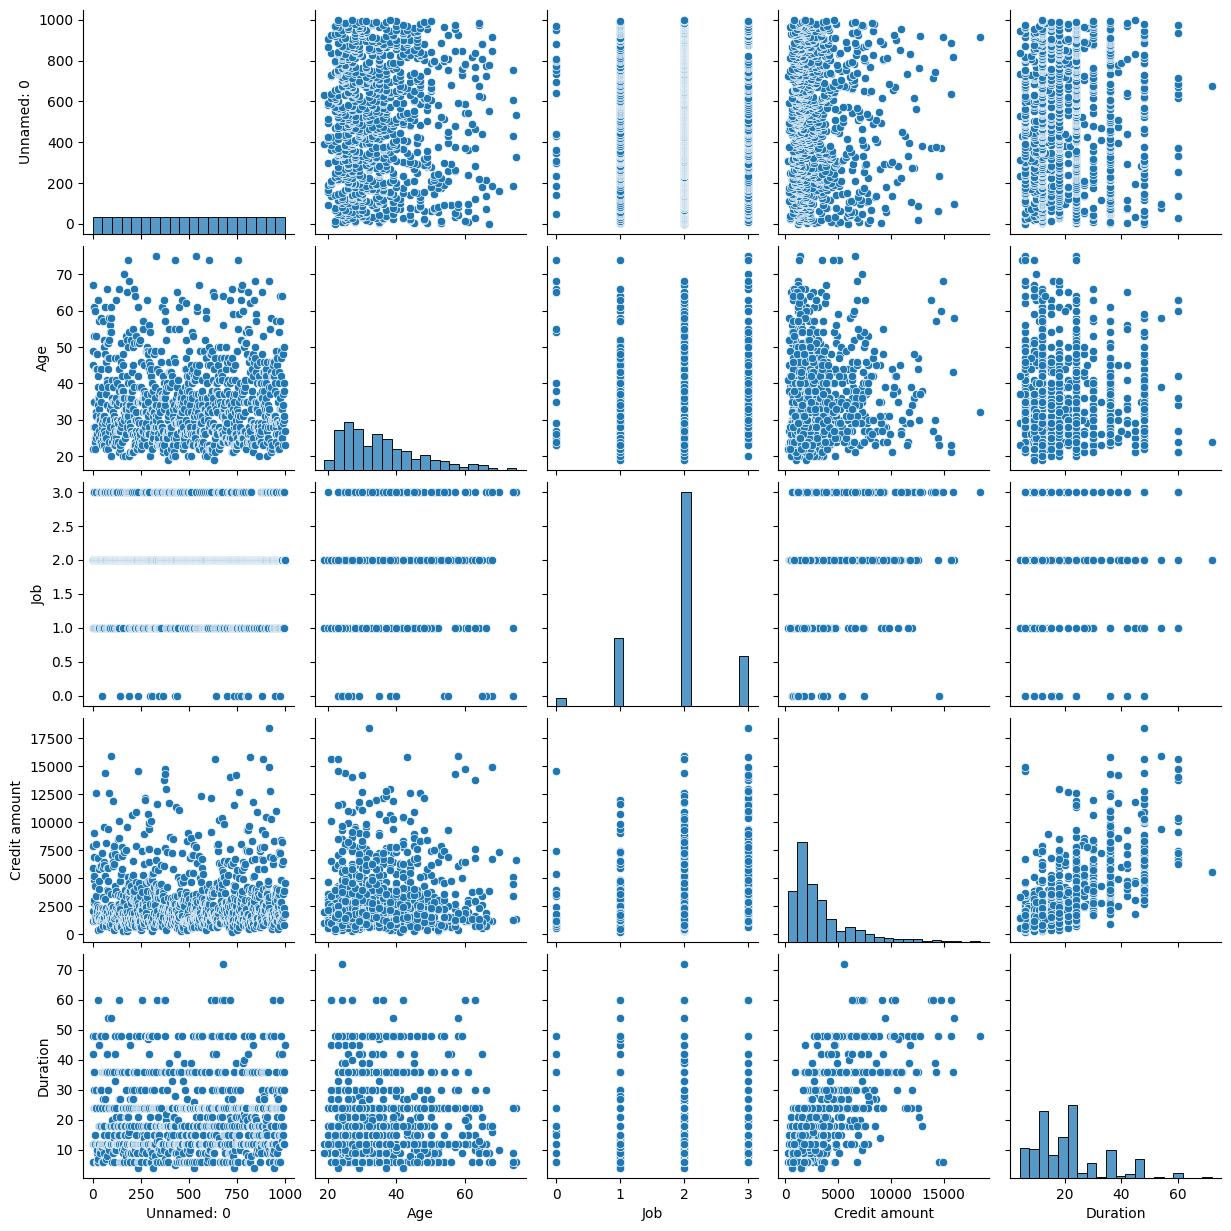

In [12]:
# Pair plot for numerical column
sns.pairplot(df, diag_kws={'bins': 20})

In [13]:
# Create a correlation matrix
CM = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(CM, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of 4 Columns')
plt.show()

ValueError: could not convert string to float: 'male'

Missing values

In [14]:
# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index

# Print
print(f"Columns with missing values:\n{missing_percentage[columns_with_missing]}")


Columns with missing values:
Saving accounts     18.3
Checking account    39.4
dtype: float64


Imputing missing value

In [15]:
df["Saving accounts"] = df["Saving accounts"].fillna(method = "bfill")
df["Checking account"] = df["Checking account"].fillna(method = "ffill")
df

<ipython-input-15-c6a2b1db5634>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Saving accounts"] = df["Saving accounts"].fillna(method = "bfill")
<ipython-input-15-c6a2b1db5634>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Checking account"] = df["Checking account"].fillna(method = "ffill")


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,moderate,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,little,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [16]:
# casting data types

savings_order = ['little', 'moderate', 'rich', 'quite rich'] # ordering variable of the
checking_order = ['little', 'moderate', 'rich'] # ordering variable of the

df["Sex"]= df["Sex"].astype("category")
df["Job"]= df["Job"].astype("category")
df["Housing"]= df["Housing"].astype("category")
df["Purpose"]= df["Purpose"].astype("category")
df["Saving accounts"] = df["Saving accounts"].astype("category")
df["Checking account"] = df["Checking account"].astype("category")
# Convert to Categorical with specified order
df["Saving accounts"] = pd.Categorical(df["Saving accounts"], categories=savings_order, ordered=True).astype("category")
df["Checking account"] = pd.Categorical(df["Checking account"], categories=checking_order, ordered=True).astype("category")






Encoding categorical to numerical


In [17]:
# Categorical to numerical codes

df["Saving accounts"] = df["Saving accounts"].cat.codes
df["Checking account"] = df["Checking account"].cat.codes

#dictionary showing the order
sav_ord = {category:code for code,category in enumerate(savings_order)}
check_ord = {category:code for code,category in enumerate(checking_order)}

print(f"Savings Account Order Dictionary:\n{sav_ord}")
print(f"Checking Account Order Dictionary:\n{check_ord}")


Savings Account Order Dictionary:
{'little': 0, 'moderate': 1, 'rich': 2, 'quite rich': 3}
Checking Account Order Dictionary:
{'little': 0, 'moderate': 1, 'rich': 2}


In [18]:
table = pd.pivot_table(df,index = ["Sex","Housing"],values = ["Credit amount","Age","Duration","Saving accounts","Checking account"],fill_value=np.mean(df['Credit amount']))
table

<ipython-input-18-54a4436184a8>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(df,index = ["Sex","Housing"],values = ["Credit amount","Age","Duration","Saving accounts","Checking account"],fill_value=np.mean(df['Credit amount']))


Age  Checking account  Credit amount   Duration  \
Sex    Housing                                                          
female free     48.105263          0.789474    5165.368421  22.473684   
       own      33.668367          0.647959    2683.556122  19.204082   
       rent     27.957895          0.578947    2820.957895  19.315789   
male   free     42.898876          0.505618    4850.887640  28.516854   
       own      36.323017          0.661509    3204.009671  20.754352   
       rent     33.095238          0.630952    3463.642857  19.154762   

                Saving accounts  
Sex    Housing                   
female free            0.368421  
       own             0.479592  
       rent            0.547368  
male   free            0.483146  
       own             0.477756  
       rent            0.452381

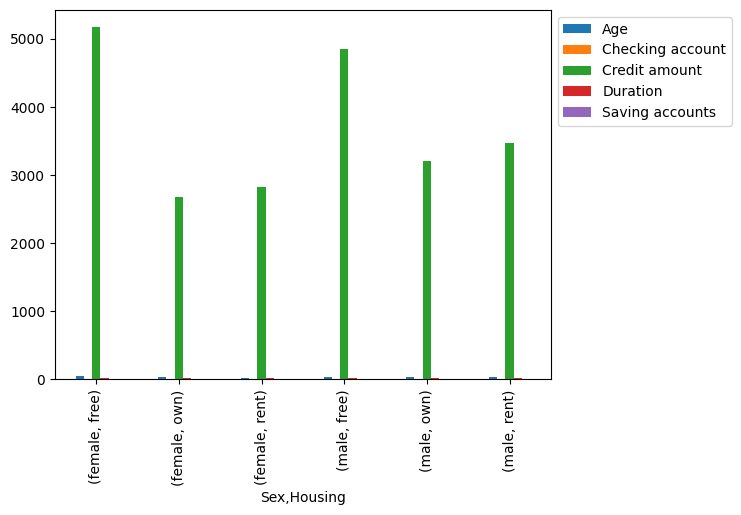

In [20]:
#frequncy bar plot

table.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # shifting the legend outside of the



In [21]:
a = table.corr()
a

,Age,Checking account,Credit amount,Duration,Saving accounts
Age,1.000000,0.409796,0.924333,0.671528,-0.808997
Checking account,0.409796,1.000000,0.203154,-0.392760,-0.775878
Credit amount,0.924333,0.203154,1.000000,0.763579,-0.687364
Duration,0.671528,-0.392760,0.763579,1.000000,-0.152395
Saving accounts,-0.808997,-0.775878,-0.687364,-0.152395,1.000000


In [22]:
# Dash app

app =Dash(__name__)
# Define app layout
app.layout = html.Div([
    html.H1("German credit Visualization"),
    # Dropdown for selecting the target variable
    html.Label("Select Target Variable"),
    dcc.Dropdown(
        id='target-variable',
        options=[{'label': col, 'value': col} for col in df.columns],
        value='target'
    ),
    # Dropdown for selecting the feature to visualize
    html.Label("Select Feature to Visualize"),
    dcc.Dropdown(
        id='feature-variable',
        options=[{'label': col, 'value': col} for col in table.columns[:-1]],  # Exclude the target variable
        value=df.columns[0]
    ),
    # Radio buttons for selecting visualization type
    html.Label("Select Visualization Type"),
    dcc.RadioItems(
        id='visualization-type',
        options=[
            {'label': 'Pairplot for 2 Features', 'value': 'pairplot'},
            {'label': 'Correlation Matrix Heatmap', 'value': 'heatmap'}
        ],
        value='pairplot',
        labelStyle={'display': 'block'}
    ),
    # Graph container
    dcc.Graph(id='graph')
])
# Callback to update the graph based on user input
@app.callback(
    Output('graph', 'figure'),
    [Input('target-variable', 'value'),
     Input('feature-variable', 'value'),
     Input('visualization-type', 'value')]
)
def update_graph(target_var, feature_var, vis_type):
    if vis_type == 'pairplot':
        # Pairplot for 2 features
        fig = px.pairplot(table, x=feature_var, y=target_var)
    else:
        # Correlation Matrix Heatmap
        corr_matrix = table.corr()
        fig = px.imshow(corr_matrix, labels=dict(x='Features', y='Features'), x=corr_matrix.columns, y=corr_matrix.columns)
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Hypothesis Testing

In [23]:
# H0 =here is no significant difference in credit amounts between different housing types.
# H1 = There is a significant difference in credit amounts between at least two housing types.
# Conducting anova test
result_anova = stats.f_oneway(
    df[df['Housing'] == 'free']['Credit amount'],
    df[df['Housing'] == 'own']['Credit amount'],
    df[df['Housing'] == 'rent']['Credit amount']
)

# Printing the result anova
print("ANOVA Result:")
print(result_anova)

# Extract p-value
p_value = result_anova.pvalue

# significance level
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print(f"\nReject the null hypothesis. There is a significant difference in credit amounts between at least two housing types.")
else:
    print(f"\nFail to reject the null hypothesis. There is no significant difference in credit amounts between housing types.")


ANOVA Result:
F_onewayResult(statistic=21.1648804442702, pvalue=9.9537054892974e-10)

Reject the null hypothesis. There is a significant difference in credit amounts between at least two housing types.


In [24]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,0,0,1169,6,radio/TV
1,1,22,female,2,own,0,1,5951,48,radio/TV
2,2,49,male,1,own,0,1,2096,12,education
3,3,45,male,2,free,0,0,7882,42,furniture/equipment
4,4,53,male,2,free,0,0,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,0,0,1736,12,furniture/equipment
996,996,40,male,3,own,0,0,3857,30,car
997,997,38,male,2,own,0,0,804,12,radio/TV
998,998,23,male,2,free,0,0,1845,45,radio/TV
